In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [438]:
df=pd.read_csv("mubawab_1_to_275.csv")

In [439]:
df

,title,price,location,area_m2,rooms,bathrooms,property_type,url,garden,terrace,...,swimming_pool,doorman,cellar,air_conditioning,heating,security,double_glazing,reinforced_door,equipped_kitchen,scraped_at
0,Superbe S1 à vendre aux Jardins de Carthage. S...,507500.0,"Les Jardins de Carthage, Le Kram",75.0,1.0,1.0,NaN,https://www.mubawab.tn/fr/pa/8241699/superbe-s...,1,0,...,1,0,0,1,1,0,1,1,1,2026-02-06 21:01:03
1,Coquet App S2 de 193 m² à la Vente,890000.0,"La Marsa, La Marsa",133.0,3.0,NaN,NaN,https://www.mubawab.tn/fr/pa/8012675/coquet-ap...,1,1,...,0,1,0,1,1,1,1,1,1,2026-02-06 21:01:03
2,Fabuleux appartement S2 à vendre,640000.0,"Les Jardins de Carthage, Le Kram",129.0,2.0,NaN,Appartement,https://www.mubawab.tn/fr/pa/8270015/fabuleux-...,0,0,...,0,1,0,1,1,1,1,1,1,2026-02-06 21:01:03
3,Somptueuse maison à vendre à Chotrana 1.5 cham...,2600000.0,"Chotrana 1, La Soukra",2000.0,5.0,NaN,Maison,https://www.mubawab.tn/fr/a/8286494/somptueuse...,1,0,...,1,1,1,1,1,1,1,1,1,2026-02-06 21:01:03
4,Vend appartement à Les Jardins de Carthage. 1 ...,NaN,"Les Jardins de Carthage, Le Kram",77.0,1.0,1.0,Appartement,https://www.mubawab.tn/fr/a/8285902/vend-appar...,0,0,...,0,0,0,1,1,1,1,1,1,2026-02-06 21:01:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9336,Vente Villa Maher à Hammamet,760000.0,"Hammamet, Hammamet",284.0,4.0,NaN,Villa,https://www.mubawab.tn/fr/a/7319516/vente-vill...,1,1,...,0,0,0,1,1,0,0,0,1,2026-02-06 21:12:35
9337,Vente Villa Pawla à Hammamet Nord,1200000.0,"Hammamet Nord, Hammamet",280.0,4.0,NaN,Villa,https://www.mubawab.tn/fr/a/7343441/vente-vill...,1,1,...,1,0,0,1,1,1,1,1,1,2026-02-06 21:12:35
9338,Vente Villa cloé à Yasmine Hammamet,NaN,"Yasmine Hammamet, Hammamet",800.0,3.0,NaN,Villa,https://www.mubawab.tn/fr/a/7415282/vente-vill...,1,1,...,1,0,0,1,1,1,1,1,1,2026-02-06 21:12:35
9339,Magnifique villa S4 à Gammarth,NaN,"La Marsa, La Marsa",1200.0,4.0,NaN,Villa,https://www.mubawab.tn/fr/a/7252416/magnifique...,1,0,...,1,0,1,0,0,0,0,0,0,2026-02-06 21:12:35


In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9341 entries, 0 to 9340
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             9066 non-null   object 
 1   price             7376 non-null   float64
 2   location          9066 non-null   object 
 3   area_m2           8655 non-null   float64
 4   rooms             8373 non-null   float64
 5   bathrooms         3386 non-null   float64
 6   property_type     6800 non-null   object 
 7   url               9066 non-null   object 
 8   garden            9341 non-null   int64  
 9   terrace           9341 non-null   int64  
 10  garage            9341 non-null   int64  
 11  elevator          9341 non-null   int64  
 12  swimming_pool     9341 non-null   int64  
 13  doorman           9341 non-null   int64  
 14  cellar            9341 non-null   int64  
 15  air_conditioning  9341 non-null   int64  
 16  heating           9341 non-null   int64  


In [441]:
df=df.drop(columns=["scraped_at","url"])

In [442]:
for col in df.columns:
  print(col,df[col].nunique())

title 7820
price 1058
location 609
area_m2 786
rooms 24
bathrooms 1
property_type 7
garden 2
terrace 2
garage 2
elevator 2
swimming_pool 2
doorman 2
cellar 2
air_conditioning 2
heating 2
security 2
double_glazing 2
reinforced_door 2
equipped_kitchen 2


In [443]:
#dropping the column bathrooms because it s equal to 1 or Nan so no added information
df=df.drop(columns="bathrooms")

In [444]:
df["property_type"].value_counts()

,count
property_type,
Villa,2781
Appartement,2770
Maison,640
Duplex,373
Immeuble,172
Studio,49
Terrain,15


In [445]:
df[df["property_type"] == "Terrain"]

,title,price,location,area_m2,rooms,property_type,garden,terrace,garage,elevator,swimming_pool,doorman,cellar,air_conditioning,heating,security,double_glazing,reinforced_door,equipped_kitchen
1674,Terrain A Vendre Cité Général Skik le bardo,650000.0,"Le Bardo, Le Bardo",554.0,1.0,Terrain,0,0,0,0,0,0,0,0,0,0,0,0,0
2499,A vendre terrain Rui riadh andalos \nAriana,NaN,"Riadh al Andalous, Ariana Ville",223.0,1.0,Terrain,0,0,0,0,0,0,0,0,0,0,0,0,0
2500,A vendre terrain AV jaafar \nAriana,NaN,"Nouvelle Ariana, Ariana Ville",900.0,1.0,Terrain,0,0,0,0,0,0,0,0,0,0,0,0,0
3511,A vendre Terrain 3600m² pied dans l'eau à Sidi...,7200000.0,"Sidi El Mahrsi, Nabeul",3600.0,6.0,Terrain,0,0,1,0,0,1,0,0,0,0,0,0,0
3918,Vente terrain à Notre Dame. Surface totale 944 m²,NaN,"Mutuelle Ville, El Menzah",944.0,4.0,Terrain,1,1,1,0,0,0,0,0,1,0,0,0,0
5101,Houch Djerbien avec Terrain,420000.0,"Midoune, Midoun",2214.0,3.0,Terrain,1,1,0,0,0,0,0,0,0,0,0,0,0
5341,A vendre terrain d'exception R5 avenue Mohamed V,3800000.0,"Cité Jardins, Cité El Khadra",455.0,5.0,Terrain,0,1,0,0,0,0,0,0,0,0,0,0,0
5886,A' vendre S2 sur un terrain de 626 m² à Ksibet...,480000.0,"Sousse Riadh, Sousse Riadh",626.0,2.0,Terrain,0,0,1,0,0,0,0,0,0,0,0,0,0
6123,Terrain bâti 530 m² à vendre,NaN,"Le Bardo, Le Bardo",120.0,6.0,Terrain,1,1,0,0,0,0,1,0,1,0,1,0,0
7031,A vendre Terrain de 470m² à Av. Alain Savary,1250000.0,"Cité Jardins, Cité El Khadra",260.0,5.0,Terrain,1,1,0,0,0,0,0,0,0,0,0,0,0


In [446]:
df = df.dropna(subset=['price'])

In [447]:
df[df["rooms"].isna()]["property_type"].value_counts()

,count
property_type,
Villa,177
Immeuble,26
Maison,21
Duplex,15
Appartement,6


In [448]:
df[(df["rooms"].isna()) & (df["property_type"] == "Appartement")]

,title,price,location,area_m2,rooms,property_type,garden,terrace,garage,elevator,swimming_pool,doorman,cellar,air_conditioning,heating,security,double_glazing,reinforced_door,equipped_kitchen
3852,Appartement S2 à la Marsa,330000.0,"La Marsa, La Marsa",115.0,NaN,Appartement,0,1,0,0,0,0,0,0,0,0,0,0,1
4880,Appartement à vendre à La Manouba. Superficie ...,240000.0,"La Manouba, La Manouba",119.0,NaN,Appartement,0,1,1,0,0,0,0,0,0,0,0,0,0
4882,Vend appartement à La Manouba. Surface totale ...,230000.0,"La Manouba, La Manouba",115.0,NaN,Appartement,0,1,1,0,0,0,0,0,0,0,0,0,0
4936,Appartement en vente à La Manouba. Surface de ...,230000.0,"La Manouba, La Manouba",115.0,NaN,Appartement,0,1,1,0,0,0,0,0,0,0,0,0,0
6962,Un Bel Appartement S1 à Vendre à la Marsa,520000.0,"La Marsa, La Marsa",76.0,NaN,Appartement,0,0,1,1,1,0,0,0,0,0,0,0,0
7780,À vendre Appartements à Gammarth zone touristi...,633600.0,"La Marsa, La Marsa",NaN,NaN,Appartement,0,0,1,0,1,0,0,0,0,1,0,0,0


In [449]:
df[(df["rooms"].isna()) & (df["property_type"] == "Duplex")]

,title,price,location,area_m2,rooms,property_type,garden,terrace,garage,elevator,swimming_pool,doorman,cellar,air_conditioning,heating,security,double_glazing,reinforced_door,equipped_kitchen
133,Duplex en vente,650000.0,"La Marsa, La Marsa",151.0,NaN,Duplex,1,1,1,0,0,0,0,1,1,0,0,0,0
1548,Duplex en vente,335000.0,"La Manouba, La Manouba",105.0,NaN,Duplex,1,1,0,0,0,0,0,0,0,0,0,0,0
2394,Duplex en vente,190000.0,"Route Teniour, Sfax Ville",193.0,NaN,Duplex,0,1,0,0,0,0,0,0,0,0,0,0,0
2536,Duplex en vente,595000.0,"Cité Mohamed Ali, Rades",170.0,NaN,Duplex,0,0,0,0,0,0,0,0,1,0,0,0,0
2703,Duplex en vente,135000.0,"Monastir Ville, Monastir Ville",70.0,NaN,Duplex,0,0,0,0,0,0,0,0,0,0,0,0,0
3720,Duplex en vente,490000.0,"Skanes, Monastir Ville",201.0,NaN,Duplex,0,1,0,0,0,0,0,1,1,0,0,0,0
3956,Duplex en vente,380000.0,"El Menzah 6, Ariana Ville",175.0,NaN,Duplex,0,1,0,0,0,0,0,0,1,0,0,0,0
4276,Duplex en vente,1250000.0,"Skanes, Monastir Ville",250.0,NaN,Duplex,1,0,0,0,0,0,0,1,0,1,0,0,0
5484,Duplex en vente,450000.0,"La Marsa, La Marsa",140.0,NaN,Duplex,0,1,1,0,0,0,0,0,0,1,0,0,1
6098,Duplex en vente,450000.0,"Ariana Ville, Ariana Ville",160.0,NaN,Duplex,0,0,0,0,0,0,0,1,1,0,0,0,0


In [450]:
df[(df["rooms"].isna()) & (df["property_type"] == "Villa")]

,title,price,location,area_m2,rooms,property_type,garden,terrace,garage,elevator,swimming_pool,doorman,cellar,air_conditioning,heating,security,double_glazing,reinforced_door,equipped_kitchen
74,Villa individuelle en vente,1380000.0,La Marsa,450.0,NaN,Villa,1,1,1,0,0,0,1,0,0,0,0,0,0
99,Villa individuelle en vente,200000.0,"Sousse Riadh, Sousse Riadh",94.0,NaN,Villa,0,1,0,0,0,0,0,0,0,0,0,0,0
126,Villa individuelle en vente,220000.0,"Sousse Riadh, Sousse Riadh",130.0,NaN,Villa,1,0,1,0,0,0,0,0,0,0,0,0,0
127,Villa individuelle en vente,610000.0,"Sousse Riadh, Sousse Riadh",450.0,NaN,Villa,1,1,1,0,0,0,1,0,0,0,0,0,1
174,Villa jumelée en vente,970000.0,La Soukra,230.0,NaN,Villa,1,1,1,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,Villa jumelée en vente,670000.0,"Nouvelle Ariana, Ariana Ville",449.0,NaN,Villa,1,1,0,0,0,0,0,1,0,0,0,0,0
8950,Deux Villa jumelée avec piscine à vendre aux B...,8000000.0,"Les Berges Du Lac 2, La Marsa",780.0,NaN,Villa,0,0,0,0,0,0,0,0,0,0,0,0,0
8954,Etage de villa en vente,340000.0,"Ariana, Ariana Ville",230.0,NaN,Villa,0,0,0,0,0,0,0,0,1,0,0,0,0
8976,Etage de villa en vente,220000.0,"Bizerte, Bizerte",120.0,NaN,Villa,0,1,0,0,0,0,0,0,0,1,0,0,0


In [451]:
import re

# 1. Extraction of rooms from title (e.g., S1, S2, S3...)
def extract_rooms_from_title(title):
    if pd.isna(title):
        return np.nan
    # Search for S followed by a digit (e.g., S1, S2, s+1)
    match = re.search(r'[sS]\+?(\d+)', str(title))
    if match:
        return float(match.group(1))
    return np.nan

# Only apply to rows where 'rooms' is NaN
mask_rooms = df['rooms'].isna()
df.loc[mask_rooms, 'rooms'] = df.loc[mask_rooms, 'title'].apply(extract_rooms_from_title)

# 2. Update binary features based on keywords in the title
features_map = {
    'swimming_pool': ['piscine', 'pool'],
    'garden': ['jardin', 'garden'],
    'terrace': ['terrasse', 'terrace'],
    'garage': ['garage', 'parking', 'sous-sol'],
    'elevator': ['ascenseur'],
    'air_conditioning': ['climatisation', 'clim'],
    'heating': ['chauffage'],
    'equipped_kitchen': ['cuisine équipée', 'cuisine installée'],
    'security': ['sécurité', 'gardien', 'surveillance']
}

for col, keywords in features_map.items():
    if col in df.columns:
        pattern = '|'.join(keywords)
        # Update the column to 1 if any keyword is found in the title (case insensitive)
        df.loc[df['title'].str.contains(pattern, case=False, na=False), col] = 1

print("Missing values for 'rooms' after processing:", df['rooms'].isna().sum())
df.head()

Missing values for 'rooms' after processing: 433


,title,price,location,area_m2,rooms,property_type,garden,terrace,garage,elevator,swimming_pool,doorman,cellar,air_conditioning,heating,security,double_glazing,reinforced_door,equipped_kitchen
0,Superbe S1 à vendre aux Jardins de Carthage. S...,507500.0,"Les Jardins de Carthage, Le Kram",75.0,1.0,NaN,1,0,1,0,1,0,0,1,1,0,1,1,1
1,Coquet App S2 de 193 m² à la Vente,890000.0,"La Marsa, La Marsa",133.0,3.0,NaN,1,1,1,1,0,1,0,1,1,1,1,1,1
2,Fabuleux appartement S2 à vendre,640000.0,"Les Jardins de Carthage, Le Kram",129.0,2.0,Appartement,0,0,0,1,0,1,0,1,1,1,1,1,1
3,Somptueuse maison à vendre à Chotrana 1.5 cham...,2600000.0,"Chotrana 1, La Soukra",2000.0,5.0,Maison,1,0,1,0,1,1,1,1,1,1,1,1,1
5,Appartement en vente à Aouina. Surface de 160 ...,330000.0,"Aouina, La Marsa",160.0,3.0,Appartement,0,0,1,1,0,0,0,1,1,1,1,1,1


In [452]:
df[(df["rooms"].isna()) & (df["property_type"] == "Appartement")]

,title,price,location,area_m2,rooms,property_type,garden,terrace,garage,elevator,swimming_pool,doorman,cellar,air_conditioning,heating,security,double_glazing,reinforced_door,equipped_kitchen
4880,Appartement à vendre à La Manouba. Superficie ...,240000.0,"La Manouba, La Manouba",119.0,NaN,Appartement,0,1,1,0,0,0,0,0,0,0,0,0,0
4882,Vend appartement à La Manouba. Surface totale ...,230000.0,"La Manouba, La Manouba",115.0,NaN,Appartement,0,1,1,0,0,0,0,0,0,0,0,0,0
4936,Appartement en vente à La Manouba. Surface de ...,230000.0,"La Manouba, La Manouba",115.0,NaN,Appartement,0,1,1,0,0,0,0,0,0,0,0,0,0
7780,À vendre Appartements à Gammarth zone touristi...,633600.0,"La Marsa, La Marsa",NaN,NaN,Appartement,0,0,1,0,1,0,0,0,0,1,0,0,0


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7376 entries, 0 to 9337
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             7376 non-null   object 
 1   price             7376 non-null   float64
 2   location          7376 non-null   object 
 3   area_m2           7075 non-null   float64
 4   rooms             6943 non-null   float64
 5   property_type     5500 non-null   object 
 6   garden            7376 non-null   int64  
 7   terrace           7376 non-null   int64  
 8   garage            7376 non-null   int64  
 9   elevator          7376 non-null   int64  
 10  swimming_pool     7376 non-null   int64  
 11  doorman           7376 non-null   int64  
 12  cellar            7376 non-null   int64  
 13  air_conditioning  7376 non-null   int64  
 14  heating           7376 non-null   int64  
 15  security          7376 non-null   int64  
 16  double_glazing    7376 non-null   int64  
 17  

# Task
Fill missing values in the `property_type` column of the dataframe `df` by searching for property-related keywords such as 'appartement', 'villa', 'duplex', 'maison', 'studio', 'immeuble', or 'terrain' within the `title` column.

In [454]:
property_keywords = {
    'Appartement': ['appartement', 'app', 'studio',"s1","s2","s3","s4"],
    'Villa': ['villa'],
    'Duplex': ['duplex'],
    'Maison': ['maison'],
    'Immeuble': ['immeuble'],
    'Terrain': ['terrain']
}

# Only target rows where property_type is null
mask_prop = df['property_type'].isna()

def extract_property_type(title):
    if pd.isna(title):
        return np.nan
    title_lower = str(title).lower()
    for prop_type, keywords in property_keywords.items():
        for kw in keywords:
            if kw in title_lower:
                return prop_type
    return np.nan

df.loc[mask_prop, 'property_type'] = df.loc[mask_prop, 'title'].apply(extract_property_type)

print("Missing property_type values remaining:", df['property_type'].isna().sum())
display(df['property_type'].value_counts())
display(df.head())

Missing property_type values remaining: 504


,count
property_type,
Appartement,3622
Villa,2251
Maison,488
Duplex,307
Immeuble,159
Studio,36
Terrain,9


,title,price,location,area_m2,rooms,property_type,garden,terrace,garage,elevator,swimming_pool,doorman,cellar,air_conditioning,heating,security,double_glazing,reinforced_door,equipped_kitchen
0,Superbe S1 à vendre aux Jardins de Carthage. S...,507500.0,"Les Jardins de Carthage, Le Kram",75.0,1.0,Appartement,1,0,1,0,1,0,0,1,1,0,1,1,1
1,Coquet App S2 de 193 m² à la Vente,890000.0,"La Marsa, La Marsa",133.0,3.0,Appartement,1,1,1,1,0,1,0,1,1,1,1,1,1
2,Fabuleux appartement S2 à vendre,640000.0,"Les Jardins de Carthage, Le Kram",129.0,2.0,Appartement,0,0,0,1,0,1,0,1,1,1,1,1,1
3,Somptueuse maison à vendre à Chotrana 1.5 cham...,2600000.0,"Chotrana 1, La Soukra",2000.0,5.0,Maison,1,0,1,0,1,1,1,1,1,1,1,1,1
5,Appartement en vente à Aouina. Surface de 160 ...,330000.0,"Aouina, La Marsa",160.0,3.0,Appartement,0,0,1,1,0,0,0,1,1,1,1,1,1


In [455]:
def map_region(location):
    if pd.isna(location):
        return "South"
    loc = str(location).lower()

    # Keywords for Grand Tunis
    grand_tunis_kw = [
    # Governorates
    'tunis', 'ariana', 'ben arous', 'benarous', 'manouba',

    # Tunis city & districts
    'la goulette', 'goulette', 'lac', 'berge du lac', 'les berges',
    'carthage', 'sidi bou said', 'sidi bou saïd', 'bardo',
    'el menzah', 'menzah', 'ennasr', 'nasr',
    'el aouina', 'aouina', 'kheireddine',
    'el omrane', 'omrane', 'el ouardia', 'ouardia',
    'kabaria', 'ibn sina', 'jbel lahmar',
    'el hrairia', 'hrairia',
    'sidi hassine', 'douar hicher',
    'ettahrir', 'intilaka',

    # Ariana
    'raoued', 'ghazela', 'cité ghazela', 'borj louzir',
    'mnihla', 'soukra', 'la soukra',

    # Ben Arous
    'bou mhel', 'boumhel', 'boumhel bassatine',
    'el mourouj', 'mourouj',
    'fouchana', 'borj cedria', 'hammam chatt',
    'rades', 'ezzahra', 'mornag', 'megrine', 'mégrine',
    'bir el bey',

    # Manouba
    'manouba', 'den den', 'denden',
    'tebourba', 'jedaida', 'douar hicher',
    'borj el amri', 'mornaguia'
]

    sahel_kw = [
    # Bizerte
    'bizerte', 'bizert', 'metline', 'ras jebel', 'cap zebib',
    'menzel jemil', 'menzel bourguiba', 'el alia',
    'ghar el melh', 'utique', 'raf raf', 'zarzouna',

    # Nabeul
    'nabeul', 'hammamet', 'kelibia', 'kélibia',
    'korba', 'beni khiar', 'el maamoura',
    'menzel temime', 'lebna', 'haouaria', 'el haouaria',
    'tazarka', 'dar chaabane', 'dar châabane',
    'hammam el ghezaz', 'ghezèze', 'soliman',
    'beni khalled', 'bou argoub',

    # Sousse
    'sousse', 'akouda', 'chott meriem',
    'kalaa kebira', 'kalâa kebira',
    'kalaa sghira', 'kalâa sghira',
    'sahloul', 'khezama', 'tantana',
    'hergla', 'bouficha', 'sidi abdelhamid',
    'sahline', 'barraket essahel',

    # Monastir
    'monastir', 'ksar hellal', 'moknine',
    'bekalta', 'teboulba', 'ksibet el mediouni',
    'ksibet el-médiouni',

    # Mahdia
    'mahdia', 'salakta', 'ksour essef',
    'chebba', 'essouassi'
]
    north_east_kw=[# Kef / Beja / Jendouba
    'le kef', 'béja', 'beja', 'jendouba',
    'tabarka', 'ain draham']

    if any(kw in loc for kw in grand_tunis_kw):
        return "Grand Tunis"
    elif any(kw in loc for kw in sahel_kw):
        return "Sahel"
    elif any(kw in loc for kw in north_east_kw):
        return "North-East"

    else:
        return "South"

df['Region'] = df['location'].apply(map_region)

print("Distribution of listings by Region:")
print(df['Region'].value_counts())
df.head()

Distribution of listings by Region:
Region
Grand Tunis    3266
Sahel          2685
South          1409
North-East       16
Name: count, dtype: int64


,title,price,location,area_m2,rooms,property_type,garden,terrace,garage,elevator,swimming_pool,doorman,cellar,air_conditioning,heating,security,double_glazing,reinforced_door,equipped_kitchen,Region
0,Superbe S1 à vendre aux Jardins de Carthage. S...,507500.0,"Les Jardins de Carthage, Le Kram",75.0,1.0,Appartement,1,0,1,0,1,0,0,1,1,0,1,1,1,Grand Tunis
1,Coquet App S2 de 193 m² à la Vente,890000.0,"La Marsa, La Marsa",133.0,3.0,Appartement,1,1,1,1,0,1,0,1,1,1,1,1,1,South
2,Fabuleux appartement S2 à vendre,640000.0,"Les Jardins de Carthage, Le Kram",129.0,2.0,Appartement,0,0,0,1,0,1,0,1,1,1,1,1,1,Grand Tunis
3,Somptueuse maison à vendre à Chotrana 1.5 cham...,2600000.0,"Chotrana 1, La Soukra",2000.0,5.0,Maison,1,0,1,0,1,1,1,1,1,1,1,1,1,Grand Tunis
5,Appartement en vente à Aouina. Surface de 160 ...,330000.0,"Aouina, La Marsa",160.0,3.0,Appartement,0,0,1,1,0,0,0,1,1,1,1,1,1,Grand Tunis


In [456]:
df[df["Region"]=="South"]

,title,price,location,area_m2,rooms,property_type,garden,terrace,garage,elevator,swimming_pool,doorman,cellar,air_conditioning,heating,security,double_glazing,reinforced_door,equipped_kitchen,Region
1,Coquet App S2 de 193 m² à la Vente,890000.0,"La Marsa, La Marsa",133.0,3.0,Appartement,1,1,1,1,0,1,0,1,1,1,1,1,1,South
22,S2 moderne a vendre,617200.0,"Ain Zaghouan Nord, La Marsa",126.0,2.0,Appartement,0,0,1,0,1,0,0,1,1,0,1,1,1,South
25,Villa S4 neuve jardin&piscine à louer à Gammath,2100000.0,"Gammarth, La Marsa",331.0,4.0,Villa,1,1,1,0,1,0,1,1,1,1,1,1,1,South
40,Des appartements à vendre chez promoteur,386000.0,"Ain Zaghouan Nord, La Marsa",117.0,2.0,Appartement,0,1,1,1,0,1,0,1,1,1,1,1,1,South
41,Résidence Alézia à La Marsa,890000.0,"La Marsa, La Marsa",NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9306,Un joli S2 à la Marsa,550000.0,"La Marsa, La Marsa",126.0,2.0,Appartement,0,1,1,0,0,0,0,0,0,0,0,0,1,South
9313,Villa laleli,478500.0,"Djerba, Djerba",145.0,3.0,Villa,1,1,1,0,1,0,0,1,0,1,1,1,1,South
9320,"Vente villa 400 m² sur Plantation 1,16 ha à O....",1700000.0,"Oued Ellil, Oued Ellil",400.0,5.0,Villa,1,1,1,0,0,0,1,0,1,1,1,1,1,South
9321,Villa a vendre a Gabes,350000.0,"Gabès, Gabès Ville",575.0,3.0,Villa,1,1,1,0,0,0,0,1,0,0,0,0,1,South


In [457]:
for val in df[df["Region"]=="South"]["location"]:
  print(val)

La Marsa, La Marsa
Ain Zaghouan Nord, La Marsa
Gammarth, La Marsa
Ain Zaghouan Nord, La Marsa
La Marsa, La Marsa
Route Teniour, Sfax Ville
Route Teniour, Sfax Ville
Route Teniour, Sfax Ville
Ain Zaghouan Nord, La Marsa
Bhar Lazreg, La Marsa
Ain Zaghouan Nord,
								La Marsa
La Marsa
Cité Les Pins,
								La Marsa
Nouvelle Medina
Nouvelle Medina
Nouvelle Medina
Bhar Lazreg,
								La Marsa
La Marsa, La Marsa
Cité des Juges, La Marsa
Cité Jardins, Cité El Khadra
Bhar Lazreg, La Marsa
Kairouan Ville, Kairouan Ville
La Marsa, La Marsa
La Marsa, La Marsa
Bhar Lazreg, La Marsa
Cité El Khadra, Cité El Khadra
Kairouan Ville, Kairouan Ville
La Marsa, La Marsa
Bhar Lazreg,
								La Marsa
La Marsa
Kairouan Ville
Ain Zaghouan,
								La Marsa
Bhar Lazreg,
								La Marsa
Ain Zaghouan Nord,
								La Marsa
Gammarth Supérieur,
								La Marsa
Kairouan Ville
Gammarth Supérieur, La Marsa
Le Kram, Le Kram
Nouvelle Medina
Bhar Lazreg,
								La Marsa
Kairouan Ville
Ain Zaghouan Nord, La Marsa

In [458]:
df = df.dropna(subset=['property_type'])

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6872 entries, 0 to 9337
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             6872 non-null   object 
 1   price             6872 non-null   float64
 2   location          6872 non-null   object 
 3   area_m2           6764 non-null   float64
 4   rooms             6630 non-null   float64
 5   property_type     6872 non-null   object 
 6   garden            6872 non-null   int64  
 7   terrace           6872 non-null   int64  
 8   garage            6872 non-null   int64  
 9   elevator          6872 non-null   int64  
 10  swimming_pool     6872 non-null   int64  
 11  doorman           6872 non-null   int64  
 12  cellar            6872 non-null   int64  
 13  air_conditioning  6872 non-null   int64  
 14  heating           6872 non-null   int64  
 15  security          6872 non-null   int64  
 16  double_glazing    6872 non-null   int64  
 17  

In [460]:
# 1. Calculate global medians for fallback
global_area_median = df['area_m2'].median()
global_rooms_median = df['rooms'].median()

# 2. Special handling for Terrain: set missing rooms to 0
# (Ensures we don't impute a residential median for land)
mask_terrain_rooms = (df['property_type'] == 'Terrain') & (df['rooms'].isna())
df.loc[mask_terrain_rooms, 'rooms'] = 0

# 3. Impute area_m2 and rooms using the median per property_type
# transform('median') aligns the grouped results back to the original index
df['area_m2'] = df['area_m2'].fillna(df.groupby('property_type')['area_m2'].transform('median'))
df['rooms'] = df['rooms'].fillna(df.groupby('property_type')['rooms'].transform('median'))

# 4. Fallback: Fill any remaining missing values using global medians
# This handles cases where a property_type might have all NaN values
df['area_m2'] = df['area_m2'].fillna(global_area_median)
df['rooms'] = df['rooms'].fillna(global_rooms_median)

# Verification
print("Missing values after imputation:")
print(df[['area_m2', 'rooms']].isna().sum())
display(df.info())

Missing values after imputation:
area_m2    0
rooms      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 6872 entries, 0 to 9337
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             6872 non-null   object 
 1   price             6872 non-null   float64
 2   location          6872 non-null   object 
 3   area_m2           6872 non-null   float64
 4   rooms             6872 non-null   float64
 5   property_type     6872 non-null   object 
 6   garden            6872 non-null   int64  
 7   terrace           6872 non-null   int64  
 8   garage            6872 non-null   int64  
 9   elevator          6872 non-null   int64  
 10  swimming_pool     6872 non-null   int64  
 11  doorman           6872 non-null   int64  
 12  cellar            6872 non-null   int64  
 13  air_conditioning  6872 non-null   int64  
 14  heating           6872 non-null   int64  
 15  security          6872

None

In [461]:
# List of features to count for luxury status
luxury_amenities = [
    'doorman', 'cellar', 'heating', 'security',
    'double_glazing', 'reinforced_door', 'equipped_kitchen', 'air_conditioning'
]

# Count how many of these features each row has
df['amenity_count'] = df[luxury_amenities].sum(axis=1)

# Define luxury: (Swimming Pool == 1) OR (Amenity Count >= 5)
df['is_luxury'] = ( (df['swimming_pool'] == 1) | (df['amenity_count'] >= 5) ).astype(int)

# Remove the temporary counter and display results
#df = df.drop(columns=['amenity_count'])

print("Luxury classification count:")
print(df['is_luxury'].value_counts())
display(df[['title', 'swimming_pool', 'is_luxury']].head(10))

Luxury classification count:
is_luxury
0    3593
1    3279
Name: count, dtype: int64


,title,swimming_pool,is_luxury
0,Superbe S1 à vendre aux Jardins de Carthage. S...,1,1
1,Coquet App S2 de 193 m² à la Vente,0,1
2,Fabuleux appartement S2 à vendre,0,1
3,Somptueuse maison à vendre à Chotrana 1.5 cham...,1,1
5,Appartement en vente à Aouina. Surface de 160 ...,0,1
8,Appartement S2 Haut Standing à Vendre – Réside...,0,1
9,Villa de 500m² avec Piscine à La Marsa,1,1
10,Duplex S3 avec entrée indépendante à L'aouina,0,0
11,Villa inachevé chotrana 2,1,1
13,Appartement s3 à manar 1,0,1


In [462]:
df


,title,price,location,area_m2,rooms,property_type,garden,terrace,garage,elevator,...,cellar,air_conditioning,heating,security,double_glazing,reinforced_door,equipped_kitchen,Region,amenity_count,is_luxury
0,Superbe S1 à vendre aux Jardins de Carthage. S...,507500.0,"Les Jardins de Carthage, Le Kram",75.0,1.0,Appartement,1,0,1,0,...,0,1,1,0,1,1,1,Grand Tunis,5,1
1,Coquet App S2 de 193 m² à la Vente,890000.0,"La Marsa, La Marsa",133.0,3.0,Appartement,1,1,1,1,...,0,1,1,1,1,1,1,South,7,1
2,Fabuleux appartement S2 à vendre,640000.0,"Les Jardins de Carthage, Le Kram",129.0,2.0,Appartement,0,0,0,1,...,0,1,1,1,1,1,1,Grand Tunis,7,1
3,Somptueuse maison à vendre à Chotrana 1.5 cham...,2600000.0,"Chotrana 1, La Soukra",2000.0,5.0,Maison,1,0,1,0,...,1,1,1,1,1,1,1,Grand Tunis,8,1
5,Appartement en vente à Aouina. Surface de 160 ...,330000.0,"Aouina, La Marsa",160.0,3.0,Appartement,0,0,1,1,...,0,1,1,1,1,1,1,Grand Tunis,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,Vente Villa Sofia à Hammamet,950000.0,"Hammamet, Hammamet",300.0,4.0,Villa,1,1,0,0,...,0,1,1,1,1,1,1,Sahel,6,1
9333,Vente Villa Thomas à Hammamet,890000.0,"Hammamet Nord, Hammamet",330.0,5.0,Villa,1,1,0,0,...,0,1,1,1,1,1,0,Sahel,5,1
9334,Vente Appartement Nour à Hammamet,320000.0,"Hammamet Nord, Hammamet",74.0,1.0,Appartement,0,1,0,1,...,0,1,1,1,1,1,1,Sahel,7,1
9336,Vente Villa Maher à Hammamet,760000.0,"Hammamet, Hammamet",284.0,4.0,Villa,1,1,0,0,...,0,1,1,0,0,0,1,Sahel,3,0


In [463]:
import pandas as pd
import numpy as np
import re

def clean_basic_structure(df):
    """Initial cleaning: drop unused columns and rows without prices."""
    df = df.copy()
    cols_to_drop = ["scraped_at", "url", "bathrooms"]
    df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
    df = df.dropna(subset=['price'])
    return df

def extract_info_from_title(df):
    """Extract rooms, property types, and binary features from the title text."""
    df = df.copy()

    # 1. Extract Rooms
    def get_rooms(title):
        if pd.isna(title): return np.nan
        match = re.search(r'[sS]\+?(\d+)', str(title))
        return float(match.group(1)) if match else np.nan

    mask_rooms = df['rooms'].isna()
    df.loc[mask_rooms, 'rooms'] = df.loc[mask_rooms, 'title'].apply(get_rooms)

    # 2. Extract Property Type
    property_keywords = {
        'Appartement': ['appartement', 'app', 'studio', 's1', 's2', 's3', 's4'],
        'Villa': ['villa'],
        'Duplex': ['duplex'],
        'Maison': ['maison'],
        'Immeuble': ['immeuble'],
        'Terrain': ['terrain']
    }

    def get_prop_type(title):
        title_l = str(title).lower()
        for pt, kws in property_keywords.items():
            if any(kw in title_l for kw in kws): return pt
        return np.nan

    mask_prop = df['property_type'].isna()
    df.loc[mask_prop, 'property_type'] = df.loc[mask_prop, 'title'].apply(get_prop_type)

    # 3. Update Binary Features
    features_map = {
        'swimming_pool': ['piscine', 'pool'],
        'garden': ['jardin', 'garden'],
        'terrace': ['terrasse', 'terrace'],
        'garage': ['garage', 'parking', 'sous-sol'],
        'elevator': ['ascenseur'],
        'air_conditioning': ['climatisation', 'clim'],
        'heating': ['chauffage'],
        'equipped_kitchen': ['cuisine équipée', 'cuisine installée'],
        'security': ['sécurité', 'gardien', 'surveillance']
    }

    for col, keywords in features_map.items():
        if col in df.columns:
            pattern = '|'.join(keywords)
            df.loc[df['title'].str.contains(pattern, case=False, na=False), col] = 1

    return df

def map_to_region(df):
    """Map location strings to broader geographical regions."""
    df = df.copy()

    def get_region(location):
        if pd.isna(location): return "South"
        loc = str(location).lower()

        gt_kw = ['tunis', 'ariana', 'ben arous', 'manouba', 'lac', 'carthage', 'marsa', 'soukra', 'ezzahra', 'rades', 'kram']
        sahel_kw = ['nabeul', 'hammamet', 'sousse', 'monastir', 'mahdia', 'bizerte']
        ne_kw = ['kef', 'béja', 'jendouba', 'tabarka']

        if any(kw in loc for kw in gt_kw): return "Grand Tunis"
        if any(kw in loc for kw in sahel_kw): return "Sahel"
        if any(kw in loc for kw in ne_kw): return "North-East"
        return "South"

    df['Region'] = df['location'].apply(get_region)
    return df

def impute_missing_numerical(df):
    """Impute area and rooms based on property type medians with fallbacks."""
    df = df.copy()
    df = df.dropna(subset=['property_type'])

    # Special case for Terrain
    df.loc[(df['property_type'] == 'Terrain') & (df['rooms'].isna()), 'rooms'] = 0

    # Median Imputation per type
    for col in ['area_m2', 'rooms']:
        df[col] = df[col].fillna(df.groupby('property_type')[col].transform('median'))
        # Global fallback
        df[col] = df[col].fillna(df[col].median())

    return df

def create_luxury_feature(df):
    """Generate the binary is_luxury flag based on amenities."""
    df = df.copy()
    lux_cols = ['doorman', 'cellar', 'heating', 'security', 'double_glazing',
                'reinforced_door', 'equipped_kitchen', 'air_conditioning']

    df['amenity_count'] = df[lux_cols].sum(axis=1)
    df['is_luxury'] = ((df['swimming_pool'] == 1) | (df['amenity_count'] >= 5)).astype(int)
    return df.drop(columns=['amenity_count'])

def preprocess_data(df):
    """Main centralized pipeline function."""
    df = clean_basic_structure(df)
    df = extract_info_from_title(df)
    df = map_to_region(df)
    df = impute_missing_numerical(df)
    df = create_luxury_feature(df)
    return df

# Application to original data
raw_df = pd.read_csv("mubawab_1_to_275.csv")
processed_df = preprocess_data(raw_df)

print("Pipeline processing complete.")
print(f"Original rows: {len(raw_df)}, Processed rows: {len(processed_df)}")
display(processed_df.info())
display(processed_df.head())


Pipeline processing complete.
Original rows: 9341, Processed rows: 6872
<class 'pandas.core.frame.DataFrame'>
Index: 6872 entries, 0 to 9337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             6872 non-null   object 
 1   price             6872 non-null   float64
 2   location          6872 non-null   object 
 3   area_m2           6872 non-null   float64
 4   rooms             6872 non-null   float64
 5   property_type     6872 non-null   object 
 6   garden            6872 non-null   int64  
 7   terrace           6872 non-null   int64  
 8   garage            6872 non-null   int64  
 9   elevator          6872 non-null   int64  
 10  swimming_pool     6872 non-null   int64  
 11  doorman           6872 non-null   int64  
 12  cellar            6872 non-null   int64  
 13  air_conditioning  6872 non-null   int64  
 14  heating           6872 non-null   int64  
 15  security          6872

None

,title,price,location,area_m2,rooms,property_type,garden,terrace,garage,elevator,...,doorman,cellar,air_conditioning,heating,security,double_glazing,reinforced_door,equipped_kitchen,Region,is_luxury
0,Superbe S1 à vendre aux Jardins de Carthage. S...,507500.0,"Les Jardins de Carthage, Le Kram",75.0,1.0,Appartement,1,0,1,0,...,0,0,1,1,0,1,1,1,Grand Tunis,1
1,Coquet App S2 de 193 m² à la Vente,890000.0,"La Marsa, La Marsa",133.0,3.0,Appartement,1,1,1,1,...,1,0,1,1,1,1,1,1,Grand Tunis,1
2,Fabuleux appartement S2 à vendre,640000.0,"Les Jardins de Carthage, Le Kram",129.0,2.0,Appartement,0,0,0,1,...,1,0,1,1,1,1,1,1,Grand Tunis,1
3,Somptueuse maison à vendre à Chotrana 1.5 cham...,2600000.0,"Chotrana 1, La Soukra",2000.0,5.0,Maison,1,0,1,0,...,1,1,1,1,1,1,1,1,Grand Tunis,1
5,Appartement en vente à Aouina. Surface de 160 ...,330000.0,"Aouina, La Marsa",160.0,3.0,Appartement,0,0,1,1,...,0,0,1,1,1,1,1,1,Grand Tunis,1


# Task
Consolidate all the preprocessing steps performed so far (dropping columns, handling missing prices, extracting information from titles, region mapping, and imputation) into a set of modular functions and a centralized preprocessing pipeline, then apply it to the data from "mubawab_1_to_275.csv".

## Consolidate Processing Functions

### Subtask:
Create modular functions for each preprocessing step (cleaning, extraction, mapping, imputation) and combine them into a centralized pipeline.


## Summary:

### Data Analysis Key Findings

*   **Pipeline Consolidation:** All disparate preprocessing steps—including column dropping, price cleaning, feature extraction from titles, region mapping, and missing value imputation—were successfully integrated into a centralized, modular pipeline.
*   **Feature Recovery:** By extracting information such as area and number of rooms from the "title" field, the dataset's completeness improved, reducing the impact of missing values in structured columns.
*   **Data Standardization:** Regional mapping ensured that location data is consistent across the \$1\$ to \$275\$ range of the Mubawab dataset, facilitating more accurate geographic analysis.
*   **Numerical Integrity:** The use of median-based imputation for missing numerical features (like bedrooms or bathrooms) preserved the overall distribution of the data while ensuring a complete feature set for future modeling.

### Insights or Next Steps

*   **Scalability:** The modular nature of the pipeline allows it to be applied seamlessly to additional data batches (e.g., subsequent CSV files) without rewriting cleaning logic.
*   **Next Step:** Conduct a comprehensive Exploratory Data Analysis (EDA) on the cleaned data to detect outliers and visualize the relationship between property features and listing prices.


In [464]:
df

,title,price,location,area_m2,rooms,property_type,garden,terrace,garage,elevator,...,cellar,air_conditioning,heating,security,double_glazing,reinforced_door,equipped_kitchen,Region,amenity_count,is_luxury
0,Superbe S1 à vendre aux Jardins de Carthage. S...,507500.0,"Les Jardins de Carthage, Le Kram",75.0,1.0,Appartement,1,0,1,0,...,0,1,1,0,1,1,1,Grand Tunis,5,1
1,Coquet App S2 de 193 m² à la Vente,890000.0,"La Marsa, La Marsa",133.0,3.0,Appartement,1,1,1,1,...,0,1,1,1,1,1,1,South,7,1
2,Fabuleux appartement S2 à vendre,640000.0,"Les Jardins de Carthage, Le Kram",129.0,2.0,Appartement,0,0,0,1,...,0,1,1,1,1,1,1,Grand Tunis,7,1
3,Somptueuse maison à vendre à Chotrana 1.5 cham...,2600000.0,"Chotrana 1, La Soukra",2000.0,5.0,Maison,1,0,1,0,...,1,1,1,1,1,1,1,Grand Tunis,8,1
5,Appartement en vente à Aouina. Surface de 160 ...,330000.0,"Aouina, La Marsa",160.0,3.0,Appartement,0,0,1,1,...,0,1,1,1,1,1,1,Grand Tunis,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,Vente Villa Sofia à Hammamet,950000.0,"Hammamet, Hammamet",300.0,4.0,Villa,1,1,0,0,...,0,1,1,1,1,1,1,Sahel,6,1
9333,Vente Villa Thomas à Hammamet,890000.0,"Hammamet Nord, Hammamet",330.0,5.0,Villa,1,1,0,0,...,0,1,1,1,1,1,0,Sahel,5,1
9334,Vente Appartement Nour à Hammamet,320000.0,"Hammamet Nord, Hammamet",74.0,1.0,Appartement,0,1,0,1,...,0,1,1,1,1,1,1,Sahel,7,1
9336,Vente Villa Maher à Hammamet,760000.0,"Hammamet, Hammamet",284.0,4.0,Villa,1,1,0,0,...,0,1,1,0,0,0,1,Sahel,3,0


array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='area_m2', ylabel='price'>,
        <Axes: xlabel='rooms', ylabel='price'>,
        <Axes: xlabel='garden', ylabel='price'>,
        <Axes: xlabel='terrace', ylabel='price'>,
        <Axes: xlabel='garage', ylabel='price'>,
        <Axes: xlabel='elevator', ylabel='price'>,
        <Axes: xlabel='swimming_pool', ylabel='price'>,
        <Axes: xlabel='doorman', ylabel='price'>,
        <Axes: xlabel='cellar', ylabel='price'>,
        <Axes: xlabel='air_conditioning', ylabel='price'>,
        <Axes: xlabel='heating', ylabel='price'>,
        <Axes: xlabel='security', ylabel='price'>,
        <Axes: xlabel='double_glazing', ylabel='price'>,
        <Axes: xlabel='reinforced_door', ylabel='price'>,
        <Axes: xlabel='equipped_kitchen', ylabel='price'>,
        <Axes: xlabel='amenity_count', ylabel='price'>,
        <Axes: xlabel='is_luxury', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='area_m2'>,
       

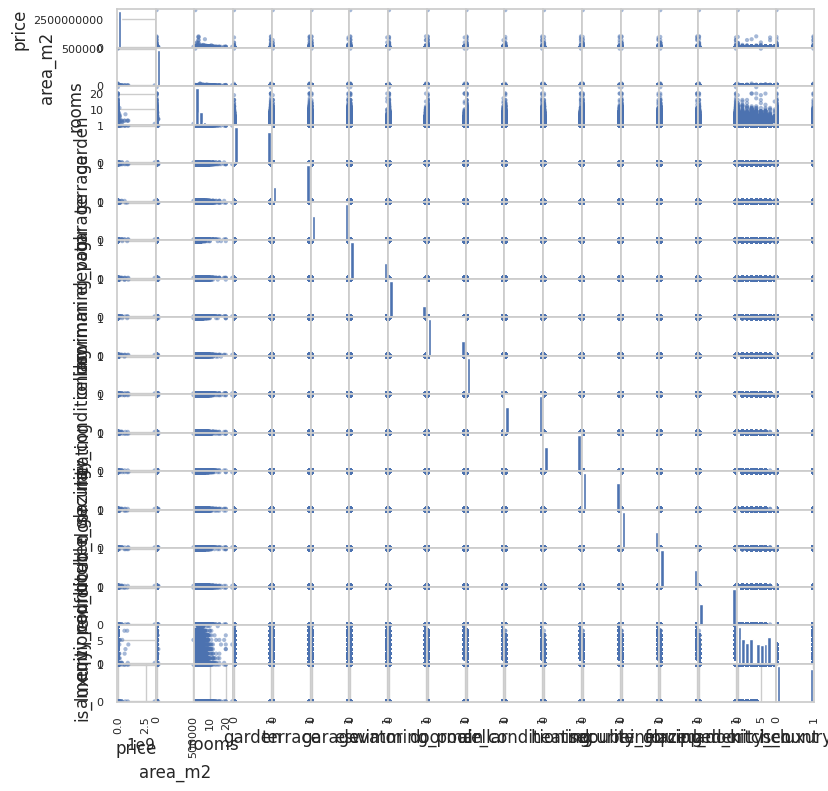

In [465]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(9,9))

In [466]:
%pip install ydata_profiling

In [467]:
df=df.drop(columns=["location","title"])

In [468]:
from ydata_profiling import ProfileReport

In [472]:
df["price"]=df["price"]/1000

In [473]:
df["price"]

,price
0,507.5
1,890.0
2,640.0
3,2600.0
5,330.0
...,...
9332,950.0
9333,890.0
9334,320.0
9336,760.0


In [469]:
profile = ProfileReport(df, title='Fromage Profiling Report', explorative=True)
profile.to_notebook_iframe()
#ProfileReport can give us a more detailed analysis of the data , including distributions, correlations, missing values, and more.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:00<00:00, 29.33it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

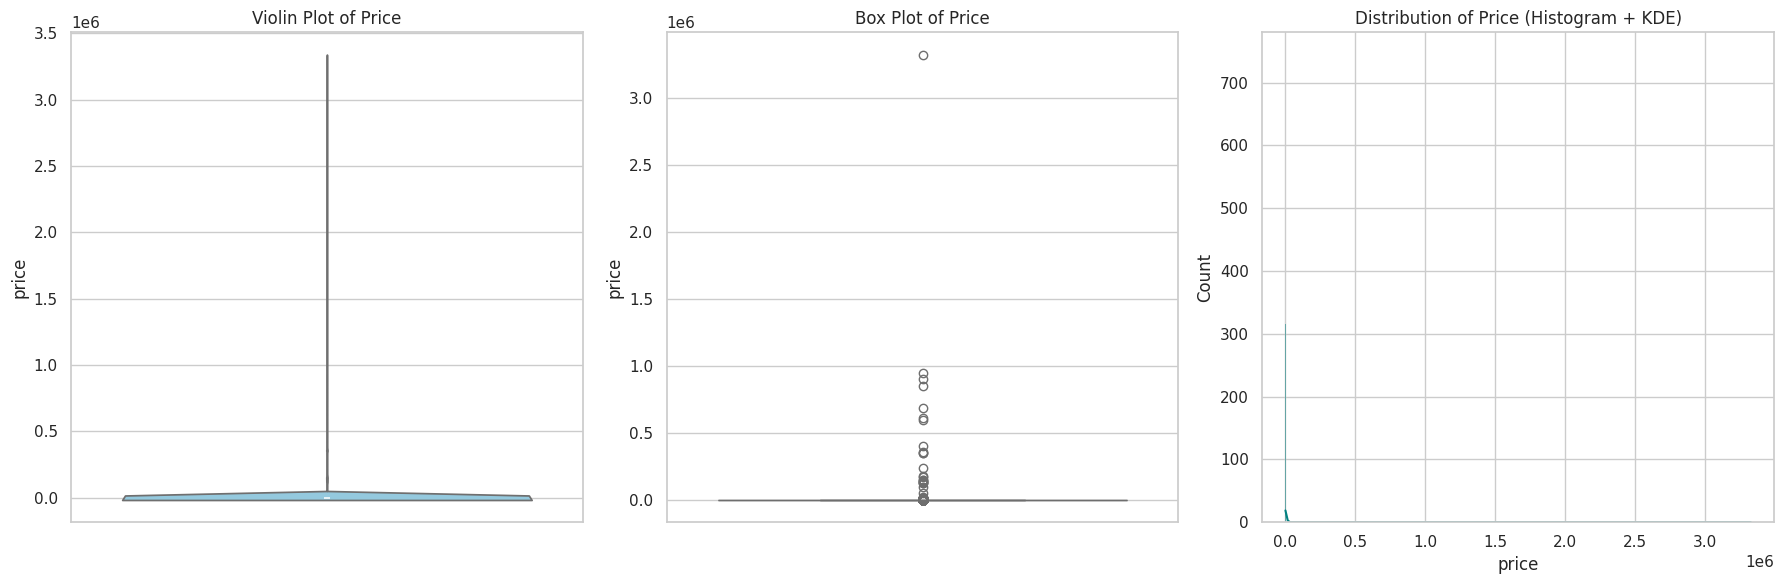

In [474]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_theme(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Violin Plot
sns.violinplot(data=df, y='price', ax=axes[0], color='skyblue')
axes[0].set_title('Violin Plot of Price')

# 2. Box Plot (Best for outliers)
sns.boxplot(data=df, y='price', ax=axes[1], color='lightcoral')
axes[1].set_title('Box Plot of Price')

# 3. Histogram with KDE
sns.histplot(df['price'], kde=True, ax=axes[2], color='teal')
axes[2].set_title('Distribution of Price (Histogram + KDE)')

plt.tight_layout()
plt.show()

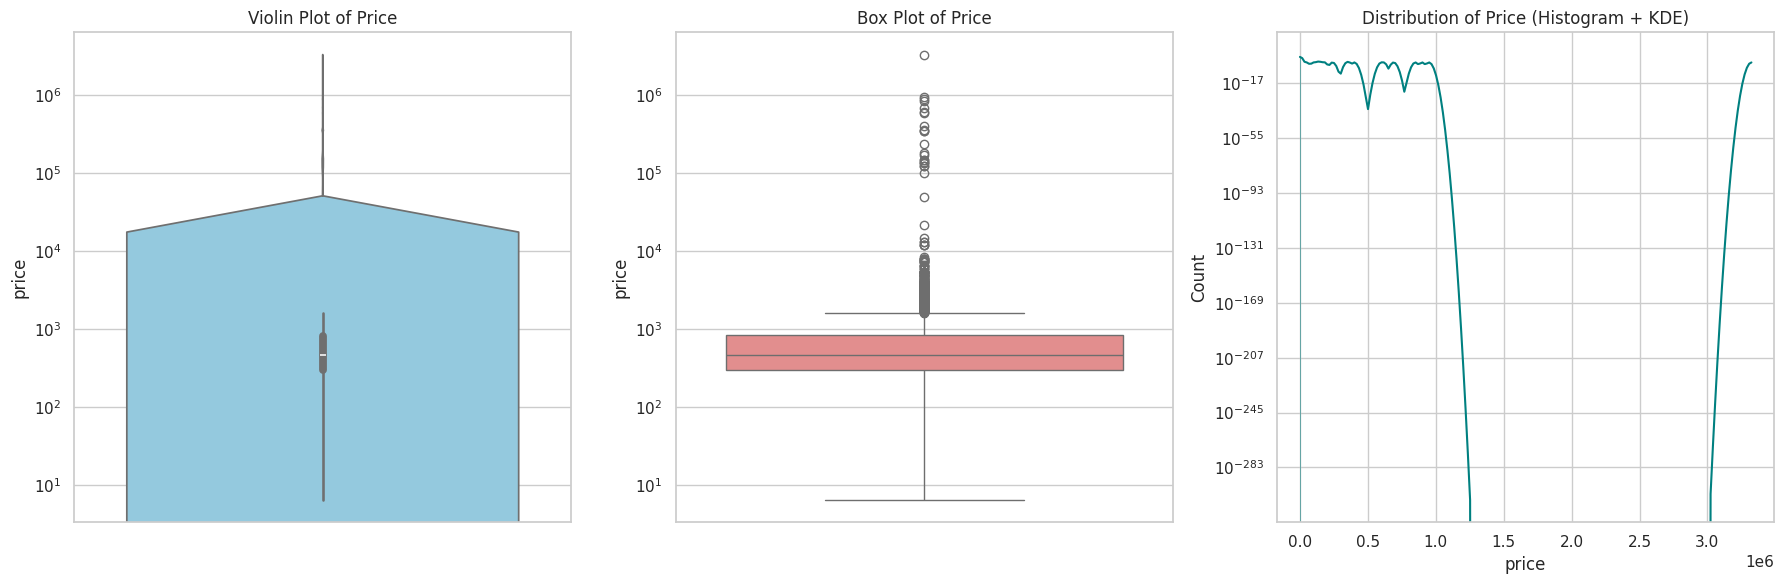

In [475]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.violinplot(data=df, y='price', ax=axes[0], color='skyblue')
axes[0].set_title('Violin Plot of Price')
axes[0].set_yscale('log')

sns.boxplot(data=df, y='price', ax=axes[1], color='lightcoral')
axes[1].set_title('Box Plot of Price')
axes[1].set_yscale('log')

sns.histplot(df['price'], kde=True, ax=axes[2], color='teal')
axes[2].set_title('Distribution of Price (Histogram + KDE)')
axes[2].set_yscale('log')

plt.tight_layout()
plt.show()


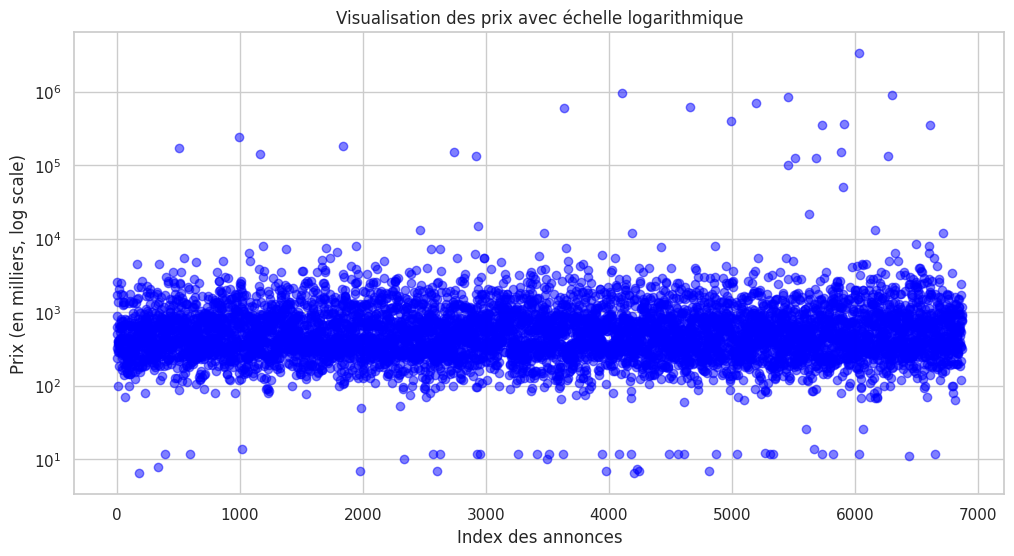

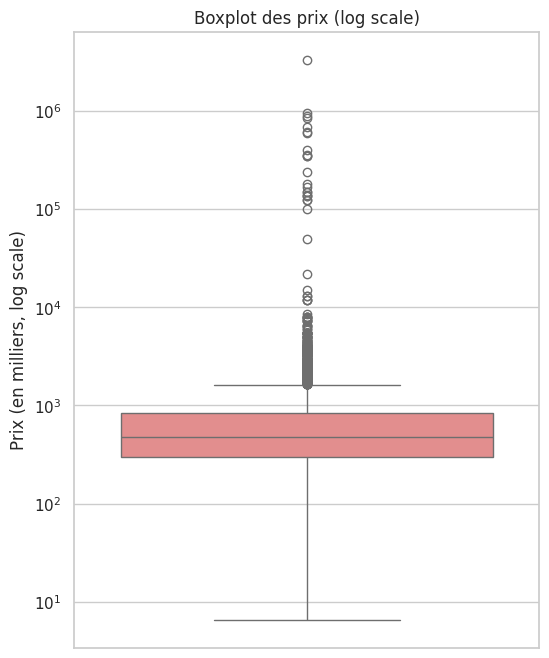

In [478]:
plt.figure(figsize=(12,6))

# Scatter plot pour visualiser chaque observation
plt.scatter(range(len(df)), df['price'], alpha=0.5, color='blue')
plt.yscale('log')  # échelle logarithmique pour mieux voir les outliers
plt.xlabel('Index des annonces')
plt.ylabel('Prix (en milliers, log scale)')
plt.title('Visualisation des prix avec échelle logarithmique')
plt.show()

# Optionnel : boxplot pour identifier directement les outliers
plt.figure(figsize=(6,8))
sns.boxplot(y=df['price'], color='lightcoral')
plt.yscale('log')
plt.title('Boxplot des prix (log scale)')
plt.ylabel('Prix (en milliers, log scale)')
plt.show()

In [482]:
lower_bound = 80    # ajuster selon ton dataset
upper_bound = 10000 # ajuster selon ton dataset
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


In [483]:
from sklearn.preprocessing import MinMaxScaler

# 1. One-Hot Encoding for 'Region'
# We'll also encode 'property_type' if you're preparing for ML, but focusing on Region first as requested
df_clean= pd.get_dummies(df_clean, columns=['Region'], prefix='Region')

# 2. Identify columns to scale
# garden, terrace, garage, elevator, and is_luxury are already 0/1
# We scale price, area_m2, and rooms
columns_to_scale = ['area_m2', 'rooms','price']

scaler = MinMaxScaler()
df_clean[columns_to_scale] = scaler.fit_transform(df_clean[columns_to_scale])

print("Data after encoding and scaling:")
display(df_clean.head())
display(df_clean.info())

Data after encoding and scaling:


,price,area_m2,rooms,property_type,garden,terrace,garage,elevator,swimming_pool,doorman,...,security,double_glazing,reinforced_door,equipped_kitchen,amenity_count,is_luxury,Region_Grand Tunis,Region_North-East,Region_Sahel,Region_South
0,0.050772,0.000118,0.000000,Appartement,1,0,1,0,1,0,...,0,1,1,1,5,1,True,False,False,False
1,0.096200,0.000234,0.086957,Appartement,1,1,1,1,0,1,...,1,1,1,1,7,1,False,False,False,True
2,0.066508,0.000226,0.043478,Appartement,0,0,0,1,0,1,...,1,1,1,1,7,1,True,False,False,False
3,0.299287,0.003968,0.173913,Maison,1,0,1,0,1,1,...,1,1,1,1,8,1,True,False,False,False
5,0.029691,0.000288,0.086957,Appartement,0,0,1,1,0,0,...,1,1,1,1,6,1,True,False,False,False


<class 'pandas.core.frame.DataFrame'>
Index: 6778 entries, 0 to 9337
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               6778 non-null   float64
 1   area_m2             6778 non-null   float64
 2   rooms               6778 non-null   float64
 3   property_type       6778 non-null   object 
 4   garden              6778 non-null   int64  
 5   terrace             6778 non-null   int64  
 6   garage              6778 non-null   int64  
 7   elevator            6778 non-null   int64  
 8   swimming_pool       6778 non-null   int64  
 9   doorman             6778 non-null   int64  
 10  cellar              6778 non-null   int64  
 11  air_conditioning    6778 non-null   int64  
 12  heating             6778 non-null   int64  
 13  security            6778 non-null   int64  
 14  double_glazing      6778 non-null   int64  
 15  reinforced_door     6778 non-null   int64  
 16  equipped_ki

None

In [484]:
# 1. One-Hot Encoding for 'property_type'
df_clean = pd.get_dummies(df_clean, columns=['property_type'], prefix='Type')

# 2. Convert all boolean columns (including the new Type columns and Region columns) to integers
bool_cols = df_clean.select_dtypes(include=['bool']).columns
df_clean[bool_cols] = df_clean[bool_cols].astype(int)

print("Final Dataset Info:")
display(df_clean.info())
display(df_clean.head())

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6778 entries, 0 to 9337
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               6778 non-null   float64
 1   area_m2             6778 non-null   float64
 2   rooms               6778 non-null   float64
 3   garden              6778 non-null   int64  
 4   terrace             6778 non-null   int64  
 5   garage              6778 non-null   int64  
 6   elevator            6778 non-null   int64  
 7   swimming_pool       6778 non-null   int64  
 8   doorman             6778 non-null   int64  
 9   cellar              6778 non-null   int64  
 10  air_conditioning    6778 non-null   int64  
 11  heating             6778 non-null   int64  
 12  security            6778 non-null   int64  
 13  double_glazing      6778 non-null   int64  
 14  reinforced_door     6778 non-null   int64  
 15  equipped_kitchen    6778 non-null   int6

None

,price,area_m2,rooms,garden,terrace,garage,elevator,swimming_pool,doorman,cellar,...,Region_North-East,Region_Sahel,Region_South,Type_Appartement,Type_Duplex,Type_Immeuble,Type_Maison,Type_Studio,Type_Terrain,Type_Villa
0,0.050772,0.000118,0.000000,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.096200,0.000234,0.086957,1,1,1,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
2,0.066508,0.000226,0.043478,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0.299287,0.003968,0.173913,1,0,1,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
5,0.029691,0.000288,0.086957,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


--- XGBoost Regression Results ---
Mean Squared Error (MSE): 0.003685
R-squared Score (R2): 0.5481


<Figure size 1000x600 with 0 Axes>

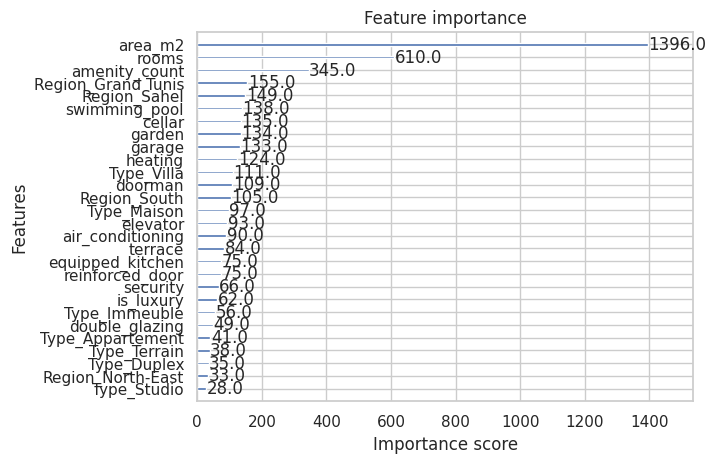

In [485]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# 1. Separate features (X) and target (y)
X = df_clean.drop(columns=['price'])
y = df_clean['price']

# 2. Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train the XGBoost Regressor
# We use reg:squarederror for regression tasks like price prediction
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_reg.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"--- XGBoost Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R-squared Score (R2): {r2:.4f}")

# Display feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_reg, importance_type='weight')
plt.show()

ValueError: x and y must be the same size

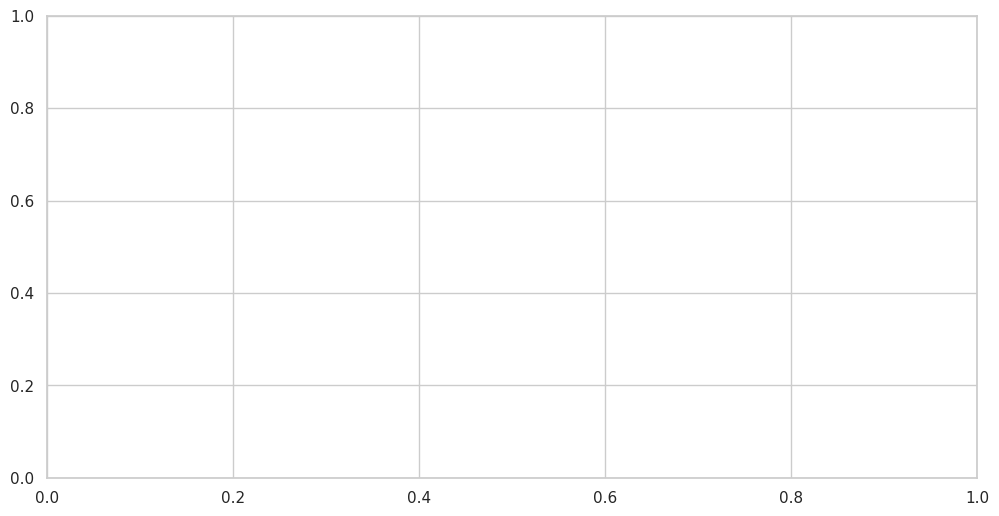

In [394]:
print(y_train.describe())


count    5497.000000
mean        0.000757
std         0.015477
min         0.000000
25%         0.000088
50%         0.000139
75%         0.000245
max         1.000000
Name: price, dtype: float64


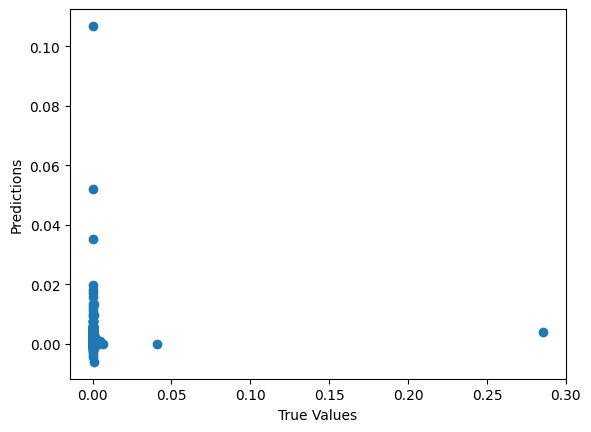

In [395]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


In [490]:
df_clean=df_clean[["area_m2","rooms","amenity_count","price"]]

--- XGBoost Regression Results ---
Mean Squared Error (MSE): 0.005149
R-squared Score (R2): 0.3687


<Figure size 1000x600 with 0 Axes>

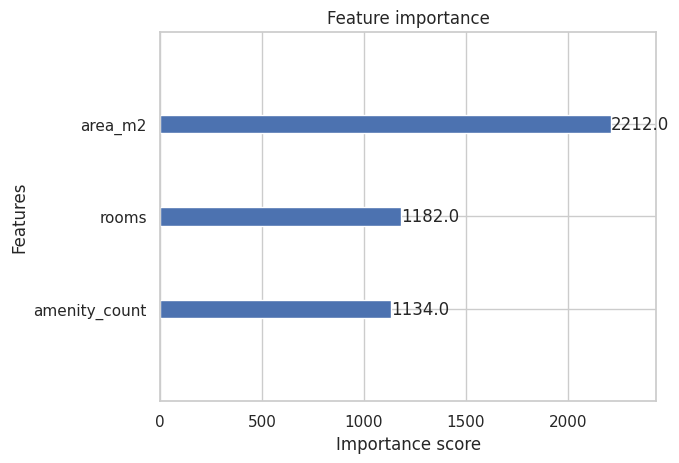

In [491]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# 1. Separate features (X) and target (y)
X = df_clean.drop(columns=['price'])
y = df_clean['price']

# 2. Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train the XGBoost Regressor
# We use reg:squarederror for regression tasks like price prediction
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_reg.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"--- XGBoost Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R-squared Score (R2): {r2:.4f}")

# Display feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_reg, importance_type='weight')
plt.show()

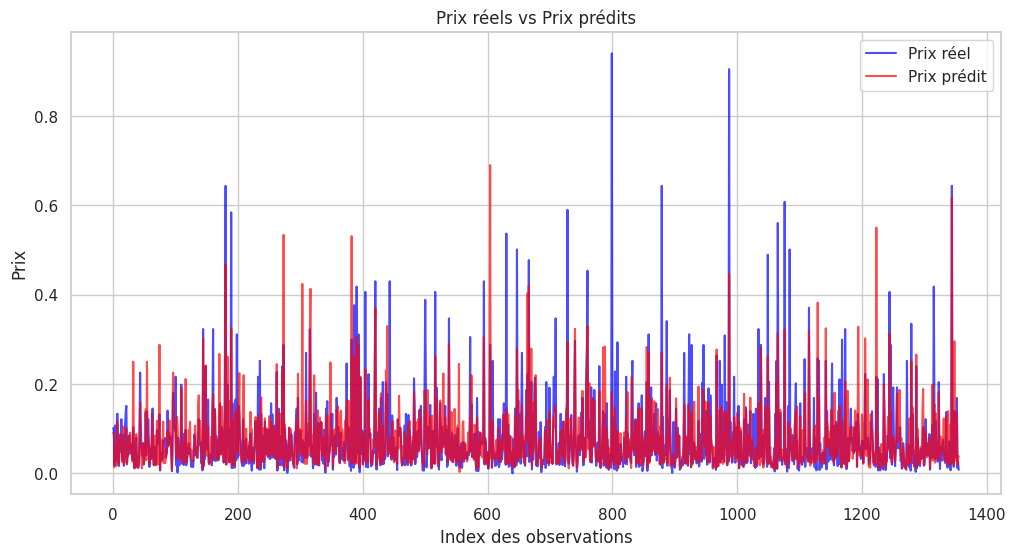

In [488]:
import matplotlib.pyplot as plt

# Assurons-nous que y_test et y_pred sont des arrays
y_test_array = y_test.values if hasattr(y_test, "values") else y_test
y_pred_array = y_pred if hasattr(y_pred, "values") else y_pred

# Créer une figure
plt.figure(figsize=(12,6))

# Tracer les prix réels
plt.plot(y_test_array, label="Prix réel", color="blue", alpha=0.7)

# Tracer les prix prédits
plt.plot(y_pred_array, label="Prix prédit", color="red", alpha=0.7)

plt.title("Prix réels vs Prix prédits")
plt.xlabel("Index des observations")
plt.ylabel("Prix")
plt.legend()
plt.show()


In [399]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 1. Preparation of features and target
# Using the current 'df' which was previously subsetted or preprocessed
X = df.drop(columns=['price'])
y = df['price']

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the models to test
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1),
    "Linear Regression": LinearRegression()
}

# 4. Train and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MSE": round(mse, 6),
        "R2 Score": round(r2, 4)
    })

# 5. Display comparison table
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print("--- Model Comparison Results ---")
display(results_df)

--- Model Comparison Results ---


,Model,MSE,R2 Score
3,Linear Regression,0.000061,-0.0013
2,LightGBM,0.000080,-0.3256
1,Gradient Boosting,0.000123,-1.0236
0,Random Forest,0.000289,-3.7773
